In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

(1) create graph from dataset based on list of edges and nodes

In [2]:
fl = pd.read_csv("internet.edgelist.txt", delimiter='\t')

In [3]:
fl

,0,1
0,0,111
1,0,219
2,0,337
3,0,740
4,0,1879
...,...,...
609060,192001,192002
609061,192115,192116
609062,192115,192117
609063,192115,192119


define graph and read in edges

In [4]:
fl.columns

Index(['0', '1'], dtype='object')

In [5]:
g = nx.Graph()
for index, row in fl.iterrows():
    g.add_edge(row['0'], row['1'])
largest_cc = max(nx.connected_components(g), key=len)
G = g.subgraph(largest_cc)

In [7]:
G.number_of_nodes() < g.number_of_nodes()

True

plot histogram of graph g

In [8]:
node_degrees = [G.degree(node) for node in G.nodes()]
Bins = range(1,max(node_degrees)+2)
Bins

range(1, 1073)

In [9]:
counts, k = np.histogram(node_degrees, bins=Bins,density=True)

In [10]:
np.sum(counts * np.diff(k))

0.9999999999999997

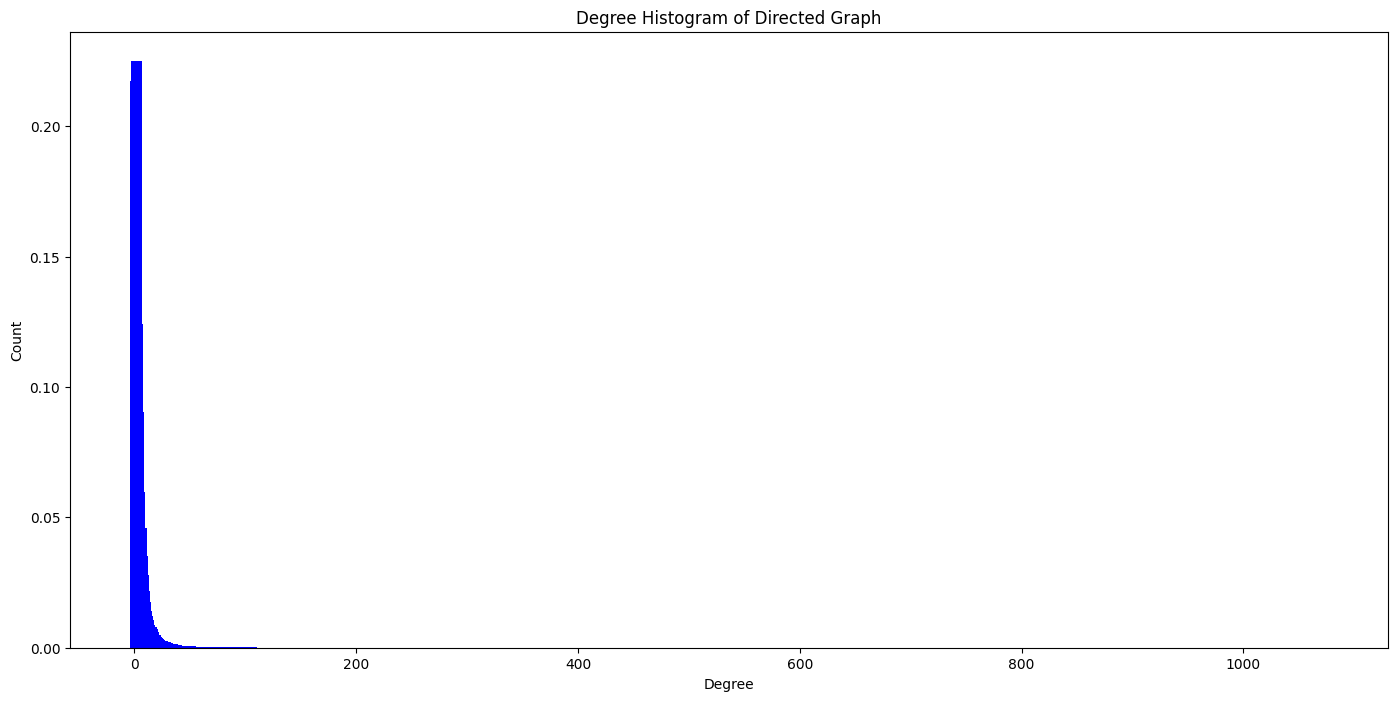

In [11]:
plt.figure(figsize=(17,8))
plt.bar(k[:-1],counts,width=10, color='b')
plt.title("Degree Histogram of Directed Graph")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

I think it's important to note the degree data in *counts* is very sparse towards the larger degrees-- but there are values in the larger degrees, but very few. Even tho it looks like matplotlib is not plotting any points past a degree of ~100, the max degree of the network is 1073, so there should exist a point plotted at degree 1073 on the histogram and should be considering when considering the degree distribution of the network. 

In [12]:
nx.average_clustering(G)

0.15817326006876706

Verifying the computation of average clusting with other nx computations

In [ ]:
sum(nx.clustering(G).values()) / G.number_of_nodes()

In [ ]:
cluster_dict = nx.clustering(G)

Largest clustering coefficient of Graph G <->

In [ ]:
max_clustering_nodes = [n for n, c_n in cluster_dict.items() if c_n == 1.0]
len(max_clustering_nodes)

FOR QUESTIONS 7 & 8, I attached code bellow using a fictional list of shortest paths between nodes of type List[List[nx.Node]] called shortest_paths

In [ ]:
longest_shortest_path_value = max(shortest_paths, key=len) # Q7
longest_shortest_path_value = np.argmax(short_paths, key=len) # Q8